In [2]:
import requests
import pandas as pd
# from google.colab import files

def get_df(name):
  url = f'https://raw.githubusercontent.com/iGEM-UGM/iGEM-UGM-drylab/main/{name}'
  response = requests.get(url)
  with open(name, 'wb') as f:
      f.write(response.content)

  return(pd.read_csv(name))

def save_data(df, filepath):
  df.to_csv(filepath, index=False)
  # Download the file
  # files.download(filepath)

/Users/macbookpro/Documents/GitHub/iGEM-UGM-2023-drylab/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 1.0-gathering-sequence

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium

# Install xvfb
apt install -y xvfb

# Install Selenium-Profiles
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.6

# pip install https://github.com/kaliiiiiiiiii/Selenium-Profiles/archive/refs/heads/dev.zip # dev-branch

# install python packages
pip install google-colab-shell
pip install webdriver-manager
pip install Pyvirtualdisplay

In [ ]:
import pandas as pd
import time
def scrap_data_design(link, trial, driver):
  driver.get(f'{link}/{trial}')  # test client hints
  # Add a time delay to allow for page loading
  time.sleep(2)  # Adjust the delay as needed
  # dropdown sequences
  button = driver.find_elements(By.CSS_SELECTOR, "div.title")[1]
  button.click()
  showscreen(driver)

  #scrap the table of result
  tables = driver.find_elements(By.CLASS_NAME, "ui.table")
  table_data = []
  for tab in tables:
    rows = tab.find_elements(By.TAG_NAME, "tr")
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, "td")
        row_data = [cell.text for cell in cells]
        table_data.append(row_data)

  df = pd.DataFrame(table_data, columns=["Domain_Strand", "Sequence"])
  return(df)

In [ ]:
def get_design_data(link):
  driver.get(link+'/0')
  # Find the menu element by its class name
  menu = driver.find_element(By.CLASS_NAME, "dropdown.icon")
  # Click the menu element
  menu.click()
  menu = driver.find_element(By.CSS_SELECTOR, "div.menu.transition.visible")
  # Find the items within the menu
  items = menu.find_elements(By.CLASS_NAME, "item")

  # Get the count of items
  item_count = len(items)
  print("Number of items:", item_count)

  # Create an empty DataFrame
  datas = pd.DataFrame()

  # Iterate over the items
  for i in range(item_count):
      # Scraping data using the scrap_data_design function
      data = scrap_data_design(link, i)

      n = len(data)  # The number of times to repeat the value
      result = [i+1] * n
      data['Trial'] = result
      # Append data to the datas DataFrame
      datas = datas.append(data, ignore_index=True)
  return(datas)

In [ ]:
from selenium_profiles.webdriver import Chrome
from selenium_profiles.profiles import profiles
from selenium.webdriver.common.by import By  # locate elements
from selenium_profiles.utils.colab_utils import display, showscreen, show_html # virtual display

from webdriver_manager.chrome import ChromeDriverManager

chromedriver_path = ChromeDriverManager(version="90.0.4430.24").install()

profile = profiles.Windows() # or .Android
profile["cdp"]["cores"] = None # Chrome 90 doesn't allow emulating cores :(driver = mydriver.start(profile, uc_driver=False, executable_path=chromedriver_path)

mydriver = Chrome(profile, executable_path=chromedriver_path)

display = display()
display.start_display()

driver = mydriver.start()
driver = mydriver.start()
# Login
driver.get('https://www.nupack.org')

# Find the button by its CSS selector
button = driver.find_element(By.CSS_SELECTOR, "a.item[href='/auth/log-in']")

# Click the button
button.click()

# Find the input field by its class name
input_field = driver.find_element(By.CLASS_NAME, "ui input")

# Clear any existing text in the input field (optional)
input_field.clear()

# Enter the desired email address
email_address = mail #add your email here
input_field.send_keys(email_address)
input_element = driver.find_element(By.CLASS_NAME, "ui.fluid.icon.input")

# Find the input field within the parent element
password_field = input_element.find_element(By.TAG_NAME, "input")
password_field.send_keys(password) #add your password here

eye_icon = driver.find_element(By.CSS_SELECTOR, ".eye.fitted.link.icon")
eye_icon.click()
# Find the button
button = driver.find_element(By.CLASS_NAME, "ui.button.orange")
button.click()

# start scrapping
link = 'https://www.nupack.org/design/results/a10996f7-3a7c-49eb-ba3c-bf682effc883'

output_sequence = get_design_data(link)

# Close the browser
driver.quit()

# save link into csv data downloaded automatically
code = link.split('/')[-1]
name = f"table_data_{code}.csv"
save_data(output_sequence, name)

# 2.0-parameter-gathering-nupack-analysis

In [17]:
import nupack
from nupack import *
def get_rbs_index(c):
    a = ''
    for i in c.strands:
        a += str(i)
    rbs = "UAGAGGAGAUG"
    index = a.find(rbs)
    return(int(index))

def calculate_gc_percentage(string):
    gc_count = string.count("G") + string.count("C")
    total_count = len(string)
    gc_percentage = (gc_count / total_count) * 100

    return(gc_percentage)

import re
import numpy as np
def check_illegal_sites(sequence, enzymes):
    illegal_sites = 0
    for enzyme, site in enzymes.items():
        matches = re.finditer(site, sequence)
        for match in matches:
            illegal_sites += 1

    return(illegal_sites)

def get_index(text):
    periods = []
    parentheses = []

    for match in re.finditer(r'\.|[()]', text):
        if match.group() == '.':
            periods.append(match.start())
        elif match.group() == '(' or match.group() == ')':
            parentheses.append(match.start())
    return periods, parentheses

def get_prob(target, matrix):
    # target = str(tube_results.complexes[Complex([b, a, c], name='(b+a+c)')].mfe[0][0]).replace("+", "")
    target = target.replace('+', '')
    # matrix = pairs(Complex([b, a, c], name='(b+a+c)'), model=model1).to_array()
    diagonal_elements = np.diag(matrix)
    non_diagonal_array = matrix - diagonal_elements
    prob = []
    for i in range(len(target)):
        if target[i] == ')' or target[i] == '(':
            prob.append(np.max(non_diagonal_array[i]))
        elif target[i] == '.':
            prob.append(diagonal_elements[i])
        else:
            continue
    return prob

def get_probability_onoff(index, data):
    prob = []
    for i in index:
        prob.append(data[i])
    return prob

def on_off(text, data):
    periods, parentheses = get_index(text)
    prob_on  = []
    prob_off = []
    prob_on = get_probability_onoff(periods, data)
    prob_off = get_probability_onoff(parentheses, data)
    return(prob_on, prob_off)

def on_off_level(text, data):
    prob_on, prob_off = on_off(text, data)
    on_level = sum(prob_on)/len(text)
    off_level = sum(prob_off)/len(text)
    return(on_level, off_level)

def stats(lists):
    try:
        mean = sum(lists) / len(lists)
        squared_differences = [(x - mean)**2 for x in lists]
        variance = sum(squared_differences) / len(lists)
        standard_deviation = variance**0.5
        sum_res = sum(lists)

        return(mean, sum_res, standard_deviation)
    except ZeroDivisionError:
        print("Error: Division by zero.")
        return 0, 0, 0

def get_analyze(t, df):
    seq = str.upper((df.loc[(df['Trial'] == t) & (df['Domain_Strand'] == 'LiRA'), 'Sequence'].values)[0])
    mir21 = 'UAGCUUAUCAGACUGAUGUUGA'
    mir92a = 'UAUUGCACUUGUCCCGGCCUGU'


    # define illegal sites enzymes
    '''
    Ecori: GAATTC GAAUUC
    Xbai: TCTAGA UCUAGA
    Spei: ACTAGT ACUAGU
    Psti: CTGCAG CUGCAG
    noti:GCGGCCGC
    '''
    enzymes = {
      "EcoRI": "GAATTC",
      "EcoRI2": "GAAUUC",
      "XbaI": "TCTAGA",
      "XbaI2": "UCUAGA",
      "SpeI": "ACTAGT",
      "SpeI2": "ACUAGU",
      "PstI": "CTGCAG",
      "PstI2": "CUGCAG",
      "NotI": "GCGGCCGC"
    }
    # analysis job

    # specify strands
    a = Strand(seq, name='a')
    b = Strand(mir21, name='b')
    c = Strand(mir92a, name='c')

    # specify tubes
    t1 = Tube(strands={a: 1e-6, b: 1e-6, c: 1e-6}, complexes=SetSpec(max_size=3, include=[[a,b], [a,c], [a,b,c]]), name='t1')
    # t2 = Tube(strands={a: 1e-10, b: 1e-9}, complexes=SetSpec(max_size=2), name='t2')

    # analyze tubes
    model1 = Model()
    tube_results = tube_analysis(tubes=[t1], model=model1, compute=['mfe','ensemble_size'])

    # Split the ASCII result into lines
    lines = str(tube_results).split('\n')

    # Extract the column names
    columns = lines[0].split()

    # Create an empty list to store the data rows
    concen_data = []

    # Iterate over the lines starting from the second line
    for line in lines[1:]:
        # Split the line into individual values
        values = line.split()
        # Append the values as a row to the data list
        concen_data.append(values)

    # Iterate through the list and find the index containing 'Concentration'
    index = None
    for i, sublist in enumerate(concen_data):
        if 'Concentration' in sublist:
            index = i
            break

    new_data = concen_data[index+1:]
    # Create the dataframe
    concen = pd.DataFrame(new_data[1:], columns=new_data[0][:-1], )

    #  data get from each sequence
    c0 = Complex([a], name='(a)')
    c1 = Complex([a, c, b], name='(a+c+b)')
    c2 = Complex([a, b, c], name='(a+b+c)')
    c3 = Complex([a, b], name='(a+b)')
    c4 = Complex([a, c], name='(a+c)')
    c5 = Complex([a, a], name='(a+a)')

    data = dict ()
    data['sequence'] = seq
    for c in [c0, c1, c2, c3, c4, c5]:
        data[str(c.name) + '_mfe'] =  tube_results.complexes[c].mfe_stack
        data[str(c.name) + '_target']  = str(tube_results.complexes[c].mfe[0][0])
        data[str(c.name) + '_pfunc'] =  tube_results.complexes[c].pfunc
        data[str(c.name) + '_free_energy'] =  tube_results.complexes[c].free_energy
        data[str(c.name) + '_ensemble_size'] =  tube_results.complexes[c].ensemble_size
        data[str(c.name) + '_mfe_energy'] =  tube_results.complexes[c].mfe_stack
        data[str(c.name) + '_mfe_stack_energy'] =  tube_results.complexes[c].mfe[0][2]
        data[str(c.name) + '_t1'] = concen.loc[concen['Complex'] == str(c.name), 't1'].values[0]
        data[str(c.name) + '_t1_rank'] = concen.index[concen['Complex'] == str(c.name)][0]
        data['on_' + str(c.name)] = len(re.findall(r'\.', str(tube_results.complexes[c].mfe[0][0]))[get_rbs_index(c):get_rbs_index(c)+18])
        print(get_rbs_index(c))
        data['off_'+ str(c.name)] = len(re.findall(r'[()]', str(tube_results.complexes[c].mfe[0][0]))[get_rbs_index(c):get_rbs_index(c)+18])
        data['prob_matrix_'+ str(c.name)] = pairs(c, model=model1).to_array()

        data['prob_' + str(c.name)] = get_prob(str(tube_results.complexes[c].mfe[0][0]).replace("+", ""), pairs(c, model=model1).to_array())
        data['prob_on_' + str(c.name)], data['prob_off_' + str(c.name)] = on_off(str(tube_results.complexes[c].mfe[0][0])[get_rbs_index(c):get_rbs_index(c)+18], data['prob_' + str(c.name)])
        data['on_level_' + str(c.name)], data['off_level_' + str(c.name)] = on_off_level(str(tube_results.complexes[c].mfe[0][0])[get_rbs_index(c):get_rbs_index(c)+18], data['prob_' + str(c.name)])
        data['on_mean_' + str(c.name)], data['on_sum_' + str(c.name)], data['on_stdev_' + str(c.name)] = stats(data['prob_on_' + str(c.name)])
        data['off_mean_' + str(c.name)], data['off_sum_' + str(c.name)], data['off_stdev_' + str(c.name)] = stats(data['prob_off_' + str(c.name)])

    data['defect'] = defect(strands=[seq], structure=data['(a)_target'], model=model1)
    data['structure_prob'] = structure_probability(strands=[seq], structure=data['(a)_target'], model=model1)
    # data['prob_matrix'] = pairs(strands=[seq], model=model1).to_array()
    # data['prob_diagonal'] = np.diagonal(pairs(strands=[seq], model=model1).to_array())
    data['gc_content'] = calculate_gc_percentage(seq)
    data['illegal_count'] = check_illegal_sites(seq, enzymes)
    return(data)

In [ ]:
def gc_segment(data):
  list_domain = ['ABS',
                  'ABS_',
                  'ATS',
                  'Complementstart',
                  'DBSCom',
                  'Loop',
                  'RBS',
                  'StartCodon',
                  '_DBS',
                  'loopCom',
                  'loopRBS',
                  'miR21bottomseal1',
                  'miR21bottomseal2',
                  'miR21topseal',
                  'miR92bottomseal1',
                  'miR92bottomseal2',
                  'miR92topseal',
                  'toeholdmiR92',
                  'toeholdmir21']
  list_segment = [['ABS', 'Complementstart', 'ABS_', 'Loop', 'ATS', 'loopRBS', 'miR21bottomseal1'],
                  ['toeholdmir21', 'miR21topseal', 'miR21bottomseal2', 'miR92bottomseal1', 'toeholdmiR92', 'miR92topseal'],
                  ['miR92bottomseal2', 'RBS', 'loopCom', '_DBS', 'StartCodon', 'DBSCom']]
  res = dict()
  list_name = ['ABS-miR21bottomseal1', 'toeholdmir21-miR92topseal', 'miR92bottomseal2-end']
  for j, name in zip(list_segment, list_name):
    # get The RNA sequence segment
    seq = ''
    for i in j:
      # print(i)
      dom = data.loc[data['Domain_Strand'] == str(i), 'Sequence'].values[0]
      seq += dom
    seq = seq.upper()
  
    print(seq)
    # compute minimum free energy (MFE) and corresponding structure
    gc_seg = calculate_gc_percentage(seq)
    res['gc_' + name] = gc_seg
  return(res)

In [ ]:
import pandas as pd

df = pd.read_csv('./table_data_a10996f7-3a7c-49eb-ba3c-bf682effc883.csv')
datas = []
for i in df['Trial'].unique().tolist():
    datas.append(get_analyze(i, df))
result = pd.DataFrame(datas)
result.head(20)
result.info()

In [ ]:
datas = []
for i in raw['Trial'].unique().tolist():
    datas.append(gc_segment(raw[raw['Trial']==i]))
datas[0]

In [ ]:
result = pd.concat([result, pd.DataFrame(datas)], axis=1)
result.head()

In [118]:
def get_on_off_each_seq(i, result):
  on_off_ratio = []
  on_off_minus = []
  for j in range(len(result)):
          # print(result['on_level_' + str(i)][j])
          # print(result['off_level_' + str(i)][j])
          ratio = result['on_level_' + str(i)][j] / result['off_level_' + str(i)][j]
          minus = result['on_level_' + str(i)][j] - result['off_level_' + str(i)][j]
        #   print(minus)
          on_off_ratio.append(ratio)
          on_off_minus.append(minus)
  return(on_off_ratio, on_off_minus)

In [135]:
def get_metrics(cols_complex, result):
  ratio_avg_list = []
  minus_avg_list = []
  on_level_avg_list = []
  off_level_avg_list = []
  w_ratio_avg_list = []
  w_minus_avg_list = []
  w_on_level_avg_list = []
  w_off_level_avg_list = []
  for j in range(len(result)):
    #   print(j)
      ratio_avg = 0
      minus_avg = 0
      on_level_avg = 0
      off_level_avg = 0
      weighted_on_level_avg = 0
      weighted_off_level_avg = 0
      weighted_minus_avg = 0
      weighted_ratio_avg = 0
      
      for i in cols_complex:
          # complex regression: ['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)']
          ratio_avg += result['on_off_ratio_' + str(i)][j]
          minus_avg += result['on_off_minus_' + str(i)][j]
          on_level_avg += result['on_level_' + str(i)][j]
          off_level_avg += result['off_level_' + str(i)][j]
          weighted_on_level_avg += (1/(result[str(i) + '_t1_rank'][j]+1))*result['on_level_' + str(i)][j]
          weighted_off_level_avg += (1/(result[str(i) + '_t1_rank'][j]+1))*result['off_level_' + str(i)][j]
          weighted_ratio_avg += (1/(result[str(i) + '_t1_rank'][j]+1))*result['on_off_ratio_' + str(i)][j]
          weighted_minus_avg += (1/(result[str(i) + '_t1_rank'][j]+1))*result['on_off_minus_' + str(i)][j]
        #   print(i)
        #   print(result['on_off_ratio_' + str(i)][j])
    #   print(j)
        #   print(minus_avg, weighted_minus_avg)
      ratio_avg_list.append(ratio_avg/len(cols_complex))
      minus_avg_list.append(minus_avg/len(cols_complex))
      on_level_avg_list.append(on_level_avg/len(cols_complex))
      off_level_avg_list.append(off_level_avg/len(cols_complex))
    #   print(j)
      #weighted
      w_ratio_avg_list.append(weighted_ratio_avg/len(cols_complex))
      w_minus_avg_list.append(weighted_minus_avg/len(cols_complex))
      w_on_level_avg_list.append(weighted_on_level_avg/len(cols_complex))
      w_off_level_avg_list.append(weighted_off_level_avg/len(cols_complex))
    #   print(j)
  return(ratio_avg_list, minus_avg_list, on_level_avg_list, off_level_avg_list,
             w_ratio_avg_list, w_minus_avg_list, w_on_level_avg_list, w_off_level_avg_list)

In [22]:
def get_complex(df):
  cols_complex = []
  for i in df.columns[df.columns.str.startswith('on_level_')].tolist()[1:-1]:
    cols_complex.append(i.split('on_level_')[1])
  print(cols_complex)
  return(cols_complex)

In [39]:
result.columns[-40:]

Index(['off_mean_(a+c)', 'off_sum_(a+c)', 'off_stdev_(a+c)', '(a+a)_mfe',
       '(a+a)_target', '(a+a)_pfunc', '(a+a)_free_energy',
       '(a+a)_ensemble_size', '(a+a)_mfe_energy', '(a+a)_mfe_stack_energy',
       '(a+a)_t1', '(a+a)_t1_rank', 'on_(a+a)', 'off_(a+a)',
       'prob_matrix_(a+a)', 'prob_(a+a)', 'prob_on_(a+a)', 'prob_off_(a+a)',
       'on_level_(a+a)', 'off_level_(a+a)', 'on_mean_(a+a)', 'on_sum_(a+a)',
       'on_stdev_(a+a)', 'off_mean_(a+a)', 'off_sum_(a+a)', 'off_stdev_(a+a)',
       'defect', 'structure_prob', 'gc_content', 'illegal_count',
       'on_off_ratio_10', 'on_off_minus_10', 'on_off_ratio_(a+c+b)',
       'on_off_minus_(a+c+b)', 'on_off_ratio_(a+b+c)', 'on_off_minus_(a+b+c)',
       'on_off_ratio_(a+b)', 'on_off_minus_(a+b)', 'on_off_ratio_(a+c)',
       'on_off_minus_(a+c)'],
      dtype='object')

In [38]:
cols_complex

['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)']

In [136]:
cols_complex = get_complex(result)
for i in cols_complex:
      # print(i)
      result['on_off_ratio_' + str(i)], result['on_off_minus_' + str(i)] = get_on_off_each_seq(i, result)
result['on_off_ratio_avg'], result['on_off_minus_avg'], result['on_level_avg'], result['off_level_avg'], result['weighted_on_off_ratio_avg'], result['weighted_on_off_minus_avg'], result['weighted_on_level_avg'], result['weighted_off_level_avg'] = get_metrics(cols_complex, result)


['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)', '(a+a)']


/var/folders/kd/60d16wd1309b3n63310hvnw00000gn/T/ipykernel_3126/221922470.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = result['on_level_' + str(i)][j] / result['off_level_' + str(i)][j]


In [138]:
metrics = ['on_off_ratio_avg', 'on_off_minus_avg', 'on_level_avg', 'off_level_avg', 
           'weighted_on_off_ratio_avg', 'weighted_on_off_minus_avg', 'weighted_on_level_avg', 
           'weighted_off_level_avg']
# print(metrics)
for i in metrics:
    print(i)
    print(result[i].unique())

on_off_ratio_avg
[1.96433608 3.41983607 2.35241734 0.81103532 2.71621296        inf
 1.98671381 1.23801211 0.82520701 1.28794273]
on_off_minus_avg
[ 0.15630131  0.08364348  0.09562134 -0.26356006  0.25968545 -0.44165774
  0.08397206 -0.0587191  -0.15745472 -0.05435107]
on_level_avg
[0.54039907 0.51650759 0.52133691 0.32483364 0.59065635 0.23305706
 0.4811781  0.39866266 0.37933304 0.38825723]
off_level_avg
[0.38409776 0.43286411 0.42571557 0.5883937  0.3309709  0.6747148
 0.39720604 0.45738176 0.53678776 0.4426083 ]
weighted_on_off_ratio_avg
[0.9855851  1.88157993 1.3371695  0.47148008 0.93656513        inf
 1.04591467 0.76797134 0.33480688 0.4183822 ]
weighted_on_off_minus_avg
[ 0.13812937  0.15713045  0.15486971  0.01940907  0.126509   -0.02090457
  0.11565757  0.08896148  0.00488967  0.03348451]
weighted_on_level_avg
[0.22636683 0.22107316 0.23322679 0.1639924  0.20008778 0.03509909
 0.2010187  0.16781222 0.13728367 0.14489302]
weighted_off_level_avg
[0.08823746 0.06394271 0.0783570

# 2.1-parameter-gathering-mfe

In [ ]:
!pip install ViennaRNA

In [7]:
def mfe_segment(data):
  list_domain = ['ABS',
                  'ABS_',
                  'ATS',
                  'Complementstart',
                  'DBSCom',
                  'Loop',
                  'RBS',
                  'StartCodon',
                  '_DBS',
                  'loopCom',
                  'loopRBS',
                  'miR21bottomseal1',
                  'miR21bottomseal2',
                  'miR21topseal',
                  'miR92bottomseal1',
                  'miR92bottomseal2',
                  'miR92topseal',
                  'toeholdmiR92',
                  'toeholdmir21']
  list_segment = [['ABS', 'Complementstart', 'ABS_', 'Loop', 'ATS', 'loopRBS', 'miR21bottomseal1'],
                  ['toeholdmir21', 'miR21topseal', 'miR21bottomseal2', 'miR92bottomseal1', 'toeholdmiR92', 'miR92topseal'],
                  ['miR92bottomseal2', 'RBS', 'loopCom', '_DBS', 'StartCodon', 'DBSCom']]
  res = dict()
  list_name = ['ABS-miR21bottomseal1', 'toeholdmir21-miR92topseal', 'miR92bottomseal2-end']
  for j, name in zip(list_segment, list_name):
    # get The RNA sequence segment
    seq = ''
    for i in j:
      # print(i)
      dom = data.loc[data['Domain_Strand'] == str(i), 'Sequence'].values[0]
      seq += dom
    seq = seq.lower()
    print(seq)
    # compute minimum free energy (MFE) and corresponding structure
    (ss, mfe) = RNA.fold(seq)
    res['mfe_' + name] = mfe
  return(res)

In [ ]:
import RNA
# import pandas as pd
# url='https://drive.google.com/file/d/1ulrMr39Uy2RaSLEaGBGOVwtSGhN11gPS/view?usp=sharing'
# file_id=url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?id=' + file_id

# df = pd.read_csv(dwn_url)
datas = []
for i in df['Trial'].unique().tolist():
    datas.append(mfe_segment(df[df['Trial']==i]))
    
result = pd.concat([result, pd.DataFrame(datas)], axis=1)
result.head()
save_data(result, './final.csv')

# 3.0-modelling

In [3]:
import pandas as pd
# df1 = pd.read_csv('nupack_params.csv')
# df2 = get_df('mfe_data_10trial_revisi.csv')
# raw = get_df('table_data_a10996f7-3a7c-49eb-ba3c-bf682effc883.csv')
# df = pd.concat([df1, df2], axis=1)
df = pd.read_csv('./final.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,sequence,(a)_mfe,(a)_target,(a)_pfunc,(a)_free_energy,(a)_ensemble_size,(a)_mfe_energy,(a)_mfe_stack_energy,(a)_t1,(a)_t1_rank,...,weighted_on_level_avg,weighted_off_level_avg,on_off_ratio_(a+a),on_off_minus_(a+a),mfe_ABS-miR21bottomseal1,mfe_toeholdmir21-miR92topseal,mfe_miR92bottomseal2-end,gc_ABS-miR21bottomseal1,gc_toeholdmir21-miR92topseal,gc_miR92bottomseal2-end
0,GGGGCCAUUUUUUAUUUUUUUACAUUAUAUUCUAUUUCAACAUCAG...,-36.106400,(((((((((((.(((((((((((((((((((((((((((.....((...,6110614266210913442312795050,-39.432095,1811761081325936349282696344000000000000000000...,-36.106400,-36.106400,2.096000e-15,4,...,0.226367,0.088237,0.153888,-0.579841,0.0,-11.6,-2.2,22.222222,33.720930,38.888889
1,GGGGCCAUUUUUUAUUUUUUUUUUAUUCUAUCAGUUUCAACAUCAG...,-49.285297,((((((((((((((((((((((.((((((((((((.(((.....((...,3.923746057261015788993891901E+36,-51.931256,5272249390332415439181367084000000000000000000000,-49.285297,-49.285297,7.436000e-12,2,...,0.221073,0.063943,0.022355,-0.904480,0.0,-11.6,-4.3,25.000000,36.046512,44.444444
2,GGGGCCAUUUUAUAUUUUUUUUCACAACACAAAUCAUCAACAUCAG...,-47.085293,(((((((((((.((((((((((.((((((((((((.(((.....((...,8.725384007099046057753729305E+34,-49.585552,696481829942754344863053098300000000000000000000,-47.085293,-47.085293,1.767000e-11,3,...,0.233227,0.078357,0.089808,-0.772259,0.0,-9.4,-1.7,30.555556,34.883721,33.333333
3,GGGGUCAUAUUACAUUUUUUUAACAAACAGCAGGGGUCAACAUCAG...,-48.343090,((((((((((..(((((((((..((((((((((((.(((.....((...,1.457252671475590043582496214E+35,-49.901663,9869658106864042090449239982000000000000000000000,-48.343090,-48.343090,6.583000e-15,5,...,0.163992,0.144583,0.228536,-0.590541,0.0,-16.1,-6.9,38.888889,41.860465,47.222222
4,GAAGCCAUCUACCAUUUUUUCCUACUUAUAUCCAACUCAACAUCAG...,-50.543095,((((((((((.((((((((((..((((((((((((.(((.....((...,9.390109725107983126823168796E+37,-53.888195,292565878506251484864541410500000000000000000000,-50.543095,-50.543095,4.511000e-11,2,...,0.200088,0.073579,0.126481,-0.705112,0.0,-11.5,-2.2,36.111111,40.697674,47.222222


In [4]:
# get columns that has variation of complexes
cols_complex = []
for i in df.columns[df.columns.str.startswith('on_level_')].tolist()[1:-1]:
  cols_complex.append(i.split('on_level_')[1])

cols_complex

['(a+c+b)', '(a+b+c)', '(a+b)', '(a+c)', '(a+a)']

In [5]:
# get the list of columns to get into regression
_param = ['_mfe',
          '_pfunc',
          '_free_energy',
          '_ensemble_size',
          '_mfe_energy',
          '_mfe_stack_energy',
          '_t1',
          '_t1_rank']
param_  = ['on_level_',
            'off_level_',
            'on_mean_',
            'on_sum_',
            'on_stdev_',
            'off_mean_',
            'off_sum_',
            'off_stdev_']
param = ['mfe_ABS-miR21bottomseal1', 'mfe_toeholdmir21-miR92topseal',
          'mfe_miR92bottomseal2-end',
          'gc_ABS-miR21bottomseal1', 'gc_toeholdmir21-miR92topseal',
          'gc_miR92bottomseal2-end',
          'gc_content', 'structure_prob', 'defect']
          
import numpy as np

def prepro(df, mode = 'infinity'):
  # change datatype to float
  df['(a)_pfunc'] = df['(a)_pfunc'].astype(float)
  df['(a)_ensemble_size'] = df['(a)_ensemble_size'].astype(float)
  df['(a+c+b)_ensemble_size'] = df['(a+c+b)_ensemble_size'].astype(float)
  df['(a+b+c)_ensemble_size'] = df['(a+b+c)_ensemble_size'].astype(float)
  df['(a+b)_ensemble_size'] = df['(a+b)_ensemble_size'].astype(float)
  df['(a+c)_ensemble_size'] = df['(a+c)_ensemble_size'].astype(float)
  df['(a+a)_ensemble_size'] = df['(a+a)_ensemble_size'].astype(float)
  df_non_inf = pd.DataFrame()
  if mode == 'infinity':
    # Check which rows contain infinity values
    rows_with_inf = df.isin([np.inf]).any(axis=1)

    # Drop rows with infinity values
    df_non_inf = df.drop(index = pd.Series(rows_with_inf)[pd.Series(rows_with_inf)].index[0])
  return(df, df_non_inf)

def get_param(df, _param, cols_complex):

  params_all = []
  for i in cols_complex:
    for j in _param:
      params_all.append(str(i+j))
    # for k in param_:
    #   params_all.append(str(k+i))
  params_all.extend(param)
  return(params_all)
# print(len(cols_complex)*(len(_param))+len(param))
# len(params_all)

In [7]:
# modelling
def get_mse_rmse(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  return mse, rmse

def linreg(X, y):
  sc_X = StandardScaler()
  X = sc_X.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Build linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)
  # Make predictions on testing set
  y_pred = model.predict(X_test)

  mse, rmse = get_mse_rmse(y_test, y_pred)
  # Get the R-squared value
  r2 = r2_score(y_test, y_pred)
  print('R^2:', r2)
  print('MSE:', mse)
  print('RMSE:', rmse)
  return(model)

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
# Check which rows contain infinity values
rows_with_inf = df.isin([np.inf]).any(axis=1)

# Drop rows with infinity values
df_non_inf = df.drop(index = pd.Series(rows_with_inf)[pd.Series(rows_with_inf)].index[0])
params_all = get_param(df, _param, cols_complex)
print(params_all)

['(a+c+b)_mfe', '(a+c+b)_pfunc', '(a+c+b)_free_energy', '(a+c+b)_ensemble_size', '(a+c+b)_mfe_energy', '(a+c+b)_mfe_stack_energy', '(a+c+b)_t1', '(a+c+b)_t1_rank', '(a+b+c)_mfe', '(a+b+c)_pfunc', '(a+b+c)_free_energy', '(a+b+c)_ensemble_size', '(a+b+c)_mfe_energy', '(a+b+c)_mfe_stack_energy', '(a+b+c)_t1', '(a+b+c)_t1_rank', '(a+b)_mfe', '(a+b)_pfunc', '(a+b)_free_energy', '(a+b)_ensemble_size', '(a+b)_mfe_energy', '(a+b)_mfe_stack_energy', '(a+b)_t1', '(a+b)_t1_rank', '(a+c)_mfe', '(a+c)_pfunc', '(a+c)_free_energy', '(a+c)_ensemble_size', '(a+c)_mfe_energy', '(a+c)_mfe_stack_energy', '(a+c)_t1', '(a+c)_t1_rank', '(a+a)_mfe', '(a+a)_pfunc', '(a+a)_free_energy', '(a+a)_ensemble_size', '(a+a)_mfe_energy', '(a+a)_mfe_stack_energy', '(a+a)_t1', '(a+a)_t1_rank', 'mfe_ABS-miR21bottomseal1', 'mfe_toeholdmir21-miR92topseal', 'mfe_miR92bottomseal2-end', 'gc_ABS-miR21bottomseal1', 'gc_toeholdmir21-miR92topseal', 'gc_miR92bottomseal2-end', 'gc_content', 'structure_prob', 'defect']


In [8]:
def display_metrics(sf, sc):
  display(pd.DataFrame({
      'Features': sf,
      'Coefficients': sc,
      'Absolute Coefficients': np.abs(sc)
  }).sort_values(by='Absolute Coefficients', ascending=False))

def metrics(model, params_all):
  # Get the coefficients of the linear regression model
  coefficients = model.coef_

  # Sort the coefficients in descending order
  sorted_indices = np.argsort(coefficients)[::-1].tolist()
  sorted_coefficients = coefficients[sorted_indices]
  sorted_features = sorted(params_all, key=lambda x: sorted_indices.index(params_all.index(x)))

  # Create a bar plot of feature importances
  plt.bar(range(len(sorted_features)), sorted_coefficients)
  plt.xticks(range(len(sorted_features)), sorted_features, rotation='vertical')
  plt.xlabel('Features')
  plt.ylabel('Coefficient')
  plt.title('Feature Coefficients')
  plt.show()
  return(sorted_features, sorted_coefficients)

In [9]:
df.columns[-20:]

Index(['on_off_ratio_(a+b)', 'on_off_minus_(a+b)', 'on_off_ratio_(a+c)',
       'on_off_minus_(a+c)', 'on_off_ratio_avg', 'on_off_minus_avg',
       'on_level_avg', 'off_level_avg', 'weighted_on_off_ratio_avg',
       'weighted_on_off_minus_avg', 'weighted_on_level_avg',
       'weighted_off_level_avg', 'on_off_ratio_(a+a)', 'on_off_minus_(a+a)',
       'mfe_ABS-miR21bottomseal1', 'mfe_toeholdmir21-miR92topseal',
       'mfe_miR92bottomseal2-end', 'gc_ABS-miR21bottomseal1',
       'gc_toeholdmir21-miR92topseal', 'gc_miR92bottomseal2-end'],
      dtype='object')

In [10]:
metrics_inf = ['on_off_ratio_avg', 'weighted_on_off_ratio_avg']
metrics_non = ['on_off_minus_avg','weighted_on_off_minus_avg', 'on_level_avg', 'off_level_avg', 
           'weighted_on_level_avg', 'weighted_off_level_avg']
# print(metrics)
for i in metrics_inf:
    print(i)
    print(df_non_inf[i].unique())
for i in metrics_non:
    print(i)
    print(df[i].unique())

on_off_ratio_avg
[1.96433608 3.41983607 2.35241734 0.81103532 2.71621296 1.98671381
 1.23801211 0.82520701 1.28794273]
weighted_on_off_ratio_avg
[0.9855851  1.88157993 1.3371695  0.47148008 0.93656513 1.04591467
 0.76797134 0.33480688 0.4183822 ]
on_off_minus_avg
[ 0.15630131  0.08364348  0.09562134 -0.26356006  0.25968545 -0.44165774
  0.08397206 -0.0587191  -0.15745472 -0.05435107]
weighted_on_off_minus_avg
[ 0.13812937  0.15713045  0.15486971  0.01940907  0.126509   -0.02090457
  0.11565757  0.08896148  0.00488967  0.03348451]
on_level_avg
[0.54039907 0.51650759 0.52133691 0.32483364 0.59065635 0.23305706
 0.4811781  0.39866266 0.37933304 0.38825723]
off_level_avg
[0.38409776 0.43286411 0.42571557 0.5883937  0.3309709  0.6747148
 0.39720604 0.45738176 0.53678776 0.4426083 ]
weighted_on_level_avg
[0.22636683 0.22107316 0.23322679 0.1639924  0.20008778 0.03509909
 0.2010187  0.16781222 0.13728367 0.14489302]
weighted_off_level_avg
[0.08823746 0.06394271 0.07835708 0.14458333 0.0735787

* ON OFF Ratio
* ON level
* OFF level
* ON OFF ratio a-c-b
* ON OFF Ratio weighted
* ON level weighted
* OFF level weighted

R^2: -0.040358610517895466
MSE: 1.750949542882227
RMSE: 1.3232345003370443


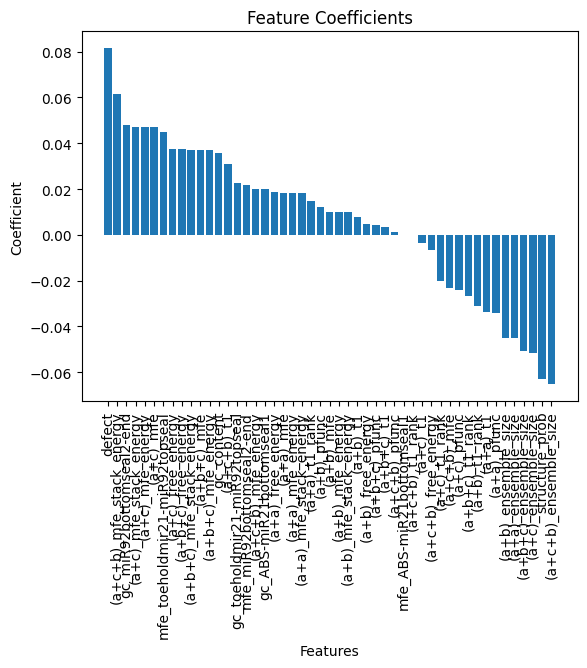

,Features,Coefficients,Absolute Coefficients
0,defect,0.081513,0.081513
48,(a+c+b)_ensemble_size,-0.065202,0.065202
47,structure_prob,-0.062787,0.062787
1,(a+c+b)_mfe_stack_energy,0.061331,0.061331
46,(a+c)_ensemble_size,-0.051659,0.051659
45,(a+b+c)_ensemble_size,-0.050872,0.050872
2,gc_miR92bottomseal2-end,0.047869,0.047869
4,(a+c)_mfe_energy,0.046985,0.046985
5,(a+c)_mfe,0.046985,0.046985
3,(a+c)_mfe_stack_energy,0.046985,0.046985


In [11]:
# on off ratio
X = df_non_inf[params_all]
y = df_non_inf['on_off_ratio_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)


R^2: -0.46306867725272594
MSE: 0.015437160882097395
RMSE: 0.12424637170596732


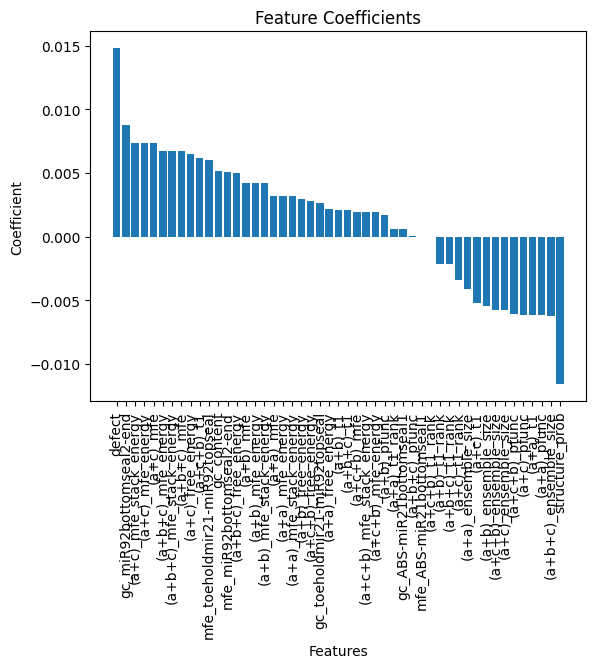

,Features,Coefficients,Absolute Coefficients
0,defect,0.014825,0.014825
48,structure_prob,-0.011613,0.011613
1,gc_miR92bottomseal2-end,0.008788,0.008788
2,(a+c)_mfe_stack_energy,0.007373,0.007373
4,(a+c)_mfe,0.007373,0.007373
3,(a+c)_mfe_energy,0.007373,0.007373
5,(a+b+c)_mfe_energy,0.006771,0.006771
6,(a+b+c)_mfe_stack_energy,0.006771,0.006771
7,(a+b+c)_mfe,0.006771,0.006771
8,(a+c)_free_energy,0.006465,0.006465


In [106]:
# on level
X = df_non_inf[params_all]
y = df_non_inf['on_level_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -2.0029871943088735
MSE: 0.0189878238047688
RMSE: 0.13779631274010493


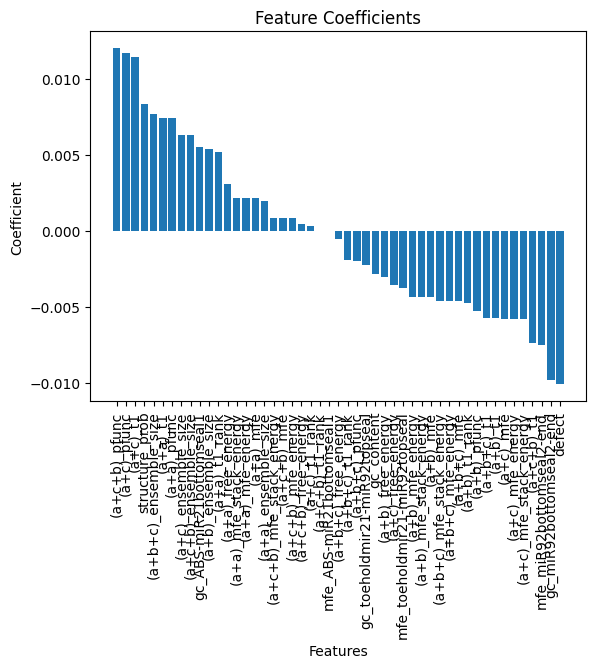

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_pfunc,0.012030,0.012030
1,(a+c)_pfunc,0.011743,0.011743
2,(a+c)_t1,0.011434,0.011434
48,defect,-0.010102,0.010102
47,gc_miR92bottomseal2-end,-0.009828,0.009828
3,structure_prob,0.008352,0.008352
4,(a+b+c)_ensemble_size,0.007669,0.007669
46,mfe_miR92bottomseal2-end,-0.007533,0.007533
5,(a+a)_t1,0.007442,0.007442
6,(a+a)_pfunc,0.007442,0.007442


In [107]:
# off level
X = df_non_inf[params_all]
y = df_non_inf['off_level_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.1945576385144172
MSE: 12.268993314025252
RMSE: 3.502712279652049


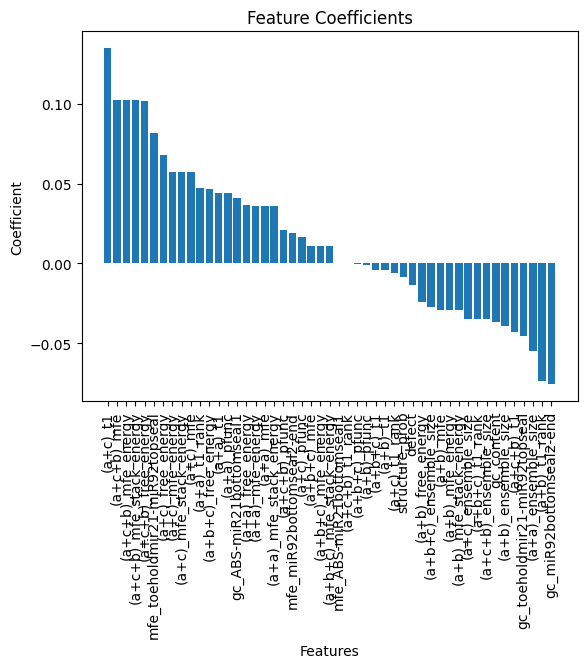

,Features,Coefficients,Absolute Coefficients
0,(a+c)_t1,0.134755,0.134755
1,(a+c+b)_mfe,0.102610,0.102610
2,(a+c+b)_mfe_energy,0.102610,0.102610
3,(a+c+b)_mfe_stack_energy,0.102610,0.102610
4,(a+c+b)_free_energy,0.101730,0.101730
5,mfe_toeholdmir21-miR92topseal,0.081642,0.081642
48,gc_miR92bottomseal2-end,-0.075536,0.075536
47,(a+b)_t1_rank,-0.073269,0.073269
6,(a+c)_free_energy,0.067752,0.067752
8,(a+c)_mfe_stack_energy,0.057271,0.057271


In [108]:
# ON OFF ratio a-c-b
X = df_non_inf[params_all]
y = df_non_inf['on_off_ratio_(a+c+b)']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.12114260638136054
MSE: 1.053805181067922
RMSE: 1.0265501356816051


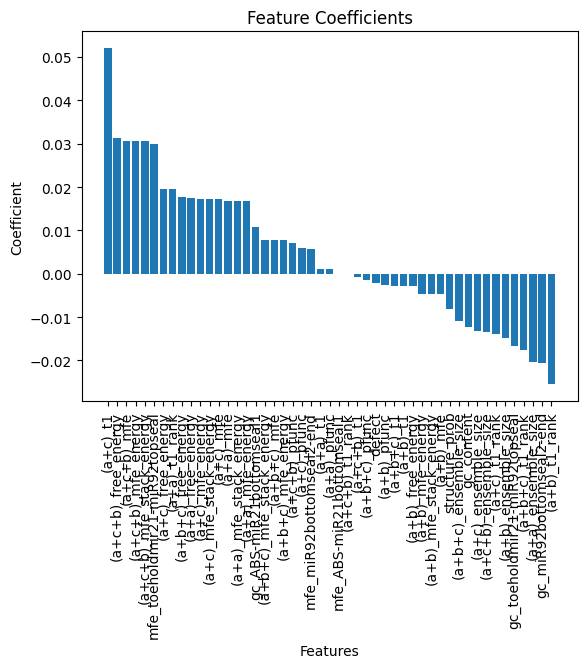

,Features,Coefficients,Absolute Coefficients
0,(a+c)_t1,0.052041,0.052041
1,(a+c+b)_free_energy,0.031214,0.031214
2,(a+c+b)_mfe,0.030681,0.030681
3,(a+c+b)_mfe_energy,0.030681,0.030681
4,(a+c+b)_mfe_stack_energy,0.030681,0.030681
5,mfe_toeholdmir21-miR92topseal,0.029861,0.029861
48,(a+b)_t1_rank,-0.025466,0.025466
47,gc_miR92bottomseal2-end,-0.020668,0.020668
46,(a+a)_ensemble_size,-0.020243,0.020243
6,(a+c)_free_energy,0.019662,0.019662


In [109]:
# ON OFF ratio weighted
X = df_non_inf[params_all]
y = df_non_inf['weighted_on_off_ratio_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.11881909391830647
MSE: 0.0033328984134648604
RMSE: 0.05773126027954751


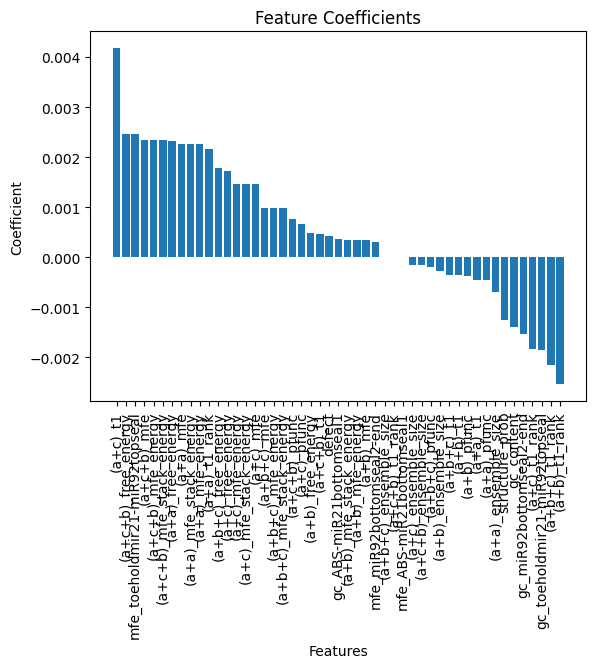

,Features,Coefficients,Absolute Coefficients
0,(a+c)_t1,0.004177,0.004177
48,(a+b)_t1_rank,-0.002537,0.002537
1,(a+c+b)_free_energy,0.002459,0.002459
2,mfe_toeholdmir21-miR92topseal,0.002452,0.002452
3,(a+c+b)_mfe,0.002334,0.002334
5,(a+c+b)_mfe_stack_energy,0.002334,0.002334
4,(a+c+b)_mfe_energy,0.002334,0.002334
6,(a+a)_free_energy,0.002313,0.002313
7,(a+a)_mfe,0.002267,0.002267
8,(a+a)_mfe_stack_energy,0.002267,0.002267


In [110]:
# ON level weighted
X = df_non_inf[params_all]
y = df_non_inf['weighted_on_level_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.35266102233250596
MSE: 0.0022362914051937133
RMSE: 0.04728944285137766


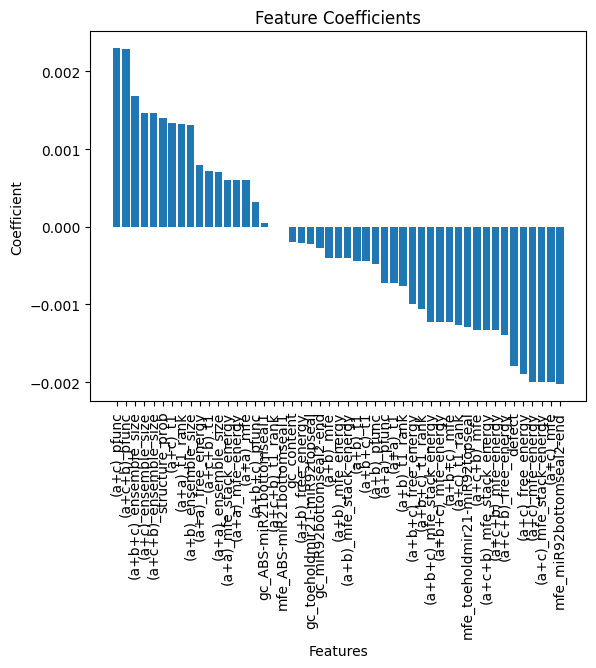

,Features,Coefficients,Absolute Coefficients
0,(a+c)_pfunc,0.002300,0.002300
1,(a+c+b)_pfunc,0.002292,0.002292
48,mfe_miR92bottomseal2-end,-0.002026,0.002026
47,(a+c)_mfe,-0.001995,0.001995
45,(a+c)_mfe_energy,-0.001995,0.001995
46,(a+c)_mfe_stack_energy,-0.001995,0.001995
44,(a+c)_free_energy,-0.001890,0.001890
43,defect,-0.001796,0.001796
2,(a+b+c)_ensemble_size,0.001678,0.001678
3,(a+c)_ensemble_size,0.001464,0.001464


In [111]:
# OFF level weighted
X = df_non_inf[params_all]
y = df_non_inf['weighted_off_level_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

In [ ]:
# on off ratio
X = df_non_inf[params_all]
y = df_non_inf['on_off_ratio_avg']
model = linreg(X, y)
sf, sc = metrics(model, params_all)
display_metrics(sf, sc)

R^2: -0.040358610517895466
MSE: 1.750949542882227
RMSE: 1.3232345003370443
on_off_ratio_avg


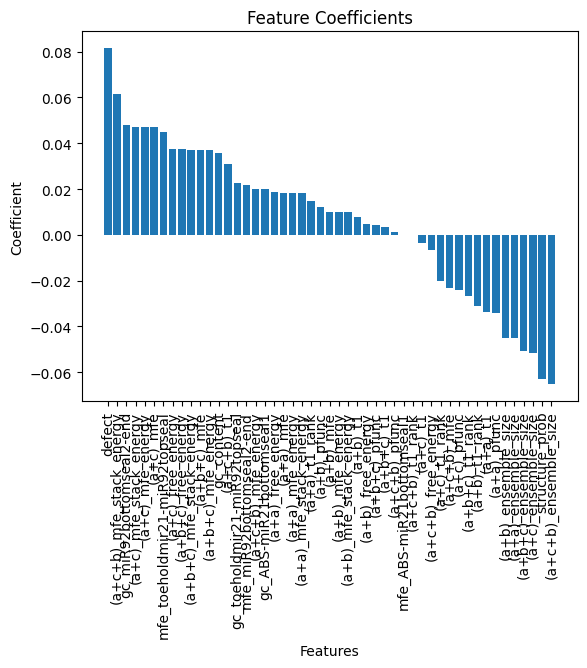

,Features,Coefficients,Absolute Coefficients
0,defect,0.081513,0.081513
48,(a+c+b)_ensemble_size,-0.065202,0.065202
47,structure_prob,-0.062787,0.062787
1,(a+c+b)_mfe_stack_energy,0.061331,0.061331
46,(a+c)_ensemble_size,-0.051659,0.051659
45,(a+b+c)_ensemble_size,-0.050872,0.050872
2,gc_miR92bottomseal2-end,0.047869,0.047869
4,(a+c)_mfe_energy,0.046985,0.046985
5,(a+c)_mfe,0.046985,0.046985
3,(a+c)_mfe_stack_energy,0.046985,0.046985


R^2: -0.1088923052157289
MSE: 0.6632581081029958
RMSE: 0.8144065987594868
weighted_on_off_ratio_avg


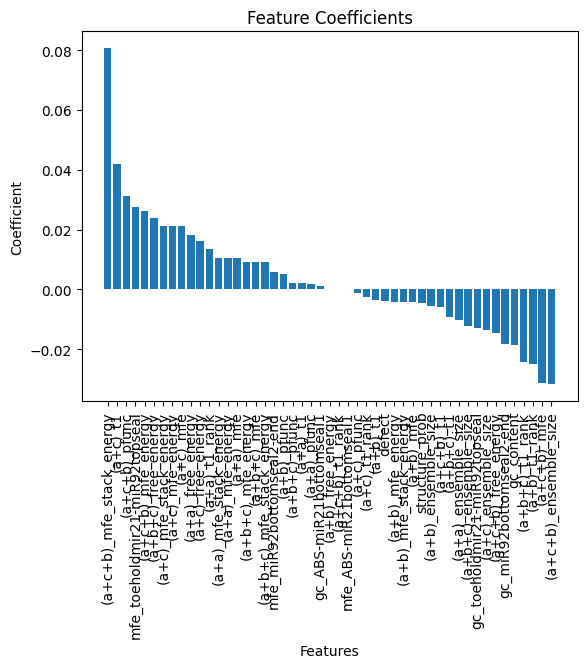

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_mfe_stack_energy,0.080662,0.080662
1,(a+c)_t1,0.041904,0.041904
48,(a+c+b)_ensemble_size,-0.031697,0.031697
47,(a+c+b)_mfe,-0.031390,0.031390
2,(a+c+b)_pfunc,0.031301,0.031301
3,mfe_toeholdmir21-miR92topseal,0.027657,0.027657
4,(a+c+b)_mfe_energy,0.026072,0.026072
46,(a+b)_t1_rank,-0.024834,0.024834
45,(a+b+c)_t1_rank,-0.024237,0.024237
5,(a+b+c)_free_energy,0.023766,0.023766


R^2: -1.6370981691304025
MSE: 0.03832253728632112
RMSE: 0.1957614295164426
on_off_minus_avg


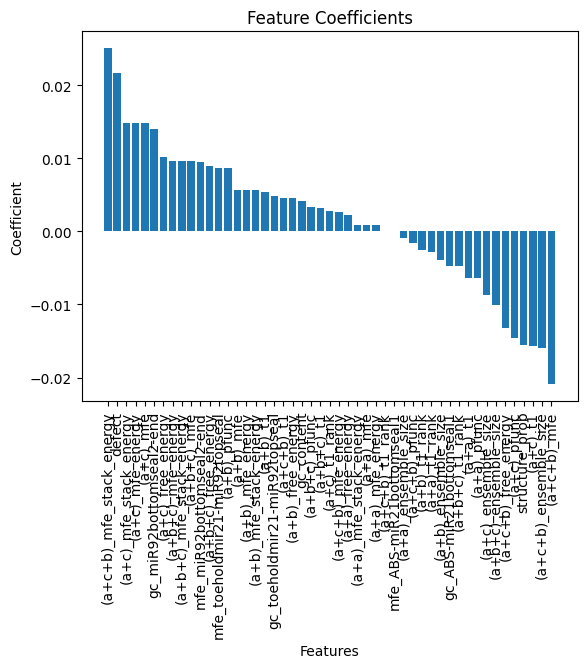

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_mfe_stack_energy,0.025054,0.025054
1,defect,0.021674,0.021674
48,(a+c+b)_mfe,-0.020906,0.020906
47,(a+c+b)_ensemble_size,-0.015970,0.015970
46,(a+c)_t1,-0.015748,0.015748
45,structure_prob,-0.015551,0.015551
3,(a+c)_mfe_energy,0.014869,0.014869
2,(a+c)_mfe_stack_energy,0.014869,0.014869
4,(a+c)_mfe,0.014869,0.014869
44,(a+c)_pfunc,-0.014613,0.014613


R^2: -0.23369990095372795
MSE: 0.0071484448797585025
RMSE: 0.08454847650761368
weighted_on_off_minus_avg


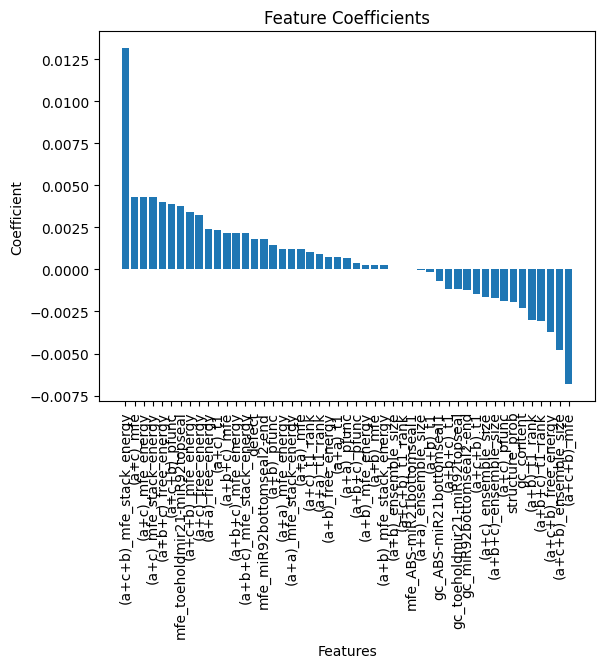

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_mfe_stack_energy,0.013155,0.013155
48,(a+c+b)_mfe,-0.006821,0.006821
47,(a+c+b)_ensemble_size,-0.004806,0.004806
2,(a+c)_mfe_energy,0.004306,0.004306
1,(a+c)_mfe,0.004306,0.004306
3,(a+c)_mfe_stack_energy,0.004306,0.004306
4,(a+b+c)_free_energy,0.004035,0.004035
5,(a+c+b)_pfunc,0.003894,0.003894
46,(a+c+b)_free_energy,-0.003746,0.003746
6,mfe_toeholdmir21-miR92topseal,0.003743,0.003743


R^2: -0.34738517692151816
MSE: 0.006338388863615149
RMSE: 0.0796139991685831
on_level_avg


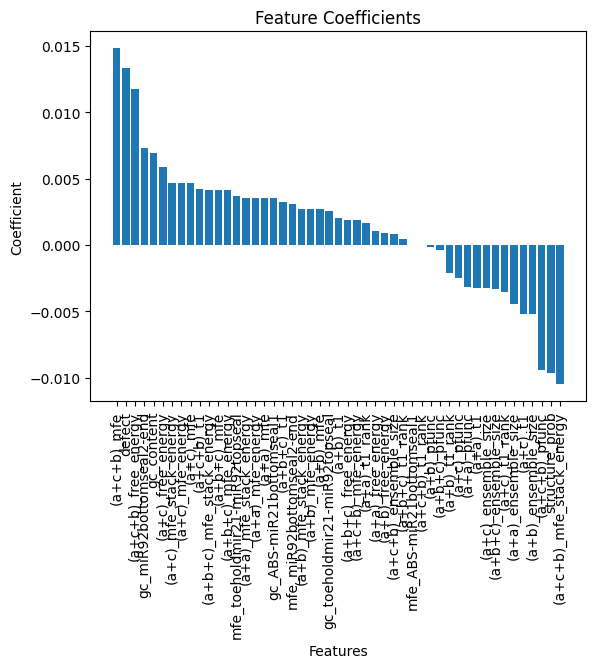

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_mfe,0.014830,0.014830
1,defect,0.013340,0.013340
2,(a+c+b)_free_energy,0.011722,0.011722
48,(a+c+b)_mfe_stack_energy,-0.010489,0.010489
47,structure_prob,-0.009649,0.009649
46,(a+c+b)_pfunc,-0.009452,0.009452
3,gc_miR92bottomseal2-end,0.007325,0.007325
4,gc_content,0.006947,0.006947
5,(a+c)_free_energy,0.005840,0.005840
45,(a+b)_ensemble_size,-0.005201,0.005201


R^2: -3.1831043688848863
MSE: 0.011294512757848933
RMSE: 0.10627564517728853
off_level_avg


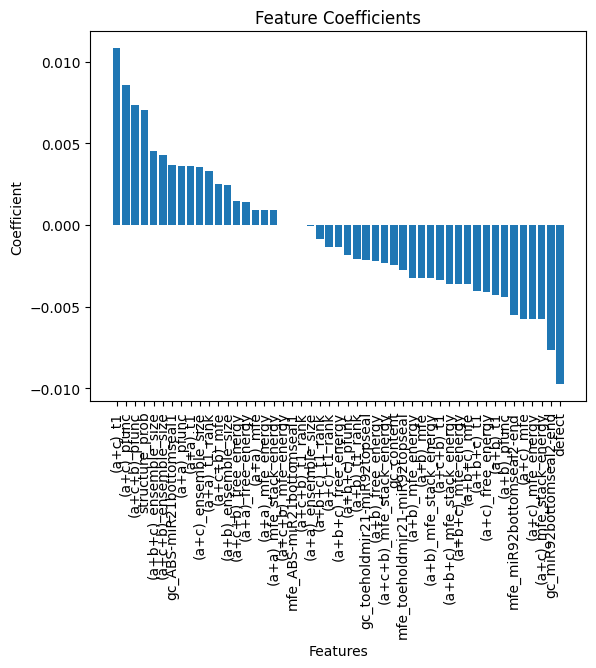

,Features,Coefficients,Absolute Coefficients
0,(a+c)_t1,0.010841,0.010841
48,defect,-0.009756,0.009756
1,(a+c)_pfunc,0.008575,0.008575
47,gc_miR92bottomseal2-end,-0.007692,0.007692
2,(a+c+b)_pfunc,0.007342,0.007342
3,structure_prob,0.007046,0.007046
44,(a+c)_mfe,-0.005762,0.005762
45,(a+c)_mfe_energy,-0.005762,0.005762
46,(a+c)_mfe_stack_energy,-0.005762,0.005762
43,mfe_miR92bottomseal2-end,-0.005528,0.005528


R^2: -0.07767625600641792
MSE: 0.00189150475149294
RMSE: 0.04349143308161896
weighted_on_level_avg


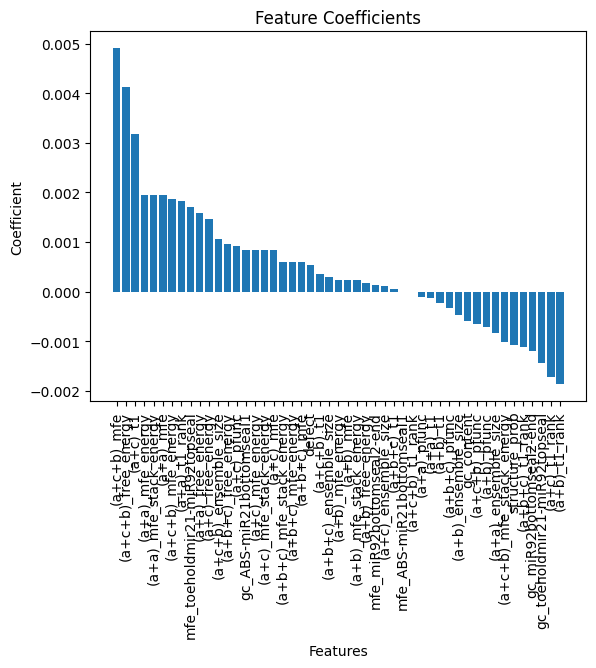

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_mfe,0.004912,0.004912
1,(a+c+b)_free_energy,0.004135,0.004135
2,(a+c)_t1,0.003188,0.003188
3,(a+a)_mfe_energy,0.001958,0.001958
4,(a+a)_mfe_stack_energy,0.001958,0.001958
5,(a+a)_mfe,0.001958,0.001958
48,(a+b)_t1_rank,-0.001868,0.001868
6,(a+c+b)_mfe_energy,0.001867,0.001867
7,(a+a)_t1_rank,0.001836,0.001836
47,(a+c)_t1_rank,-0.001716,0.001716


R^2: -0.35804150198788065
MSE: 0.0015908029056217615
RMSE: 0.03988487063564029
weighted_off_level_avg


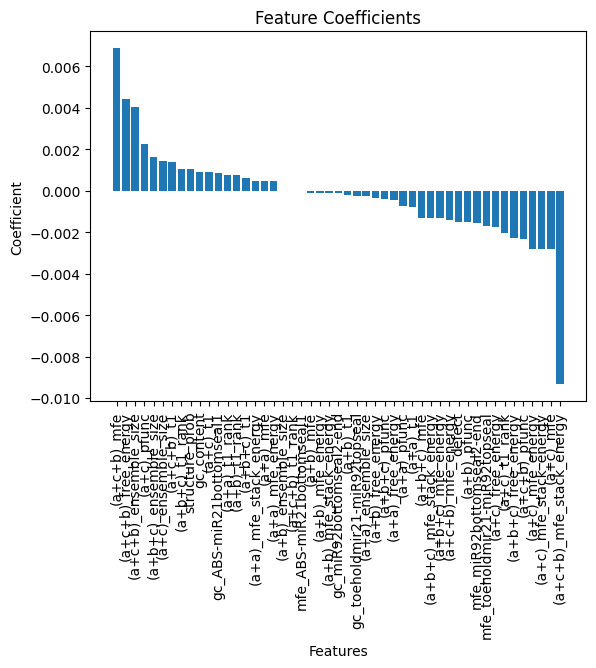

,Features,Coefficients,Absolute Coefficients
48,(a+c+b)_mfe_stack_energy,-0.009335,0.009335
0,(a+c+b)_mfe,0.006885,0.006885
1,(a+c+b)_free_energy,0.004454,0.004454
2,(a+c+b)_ensemble_size,0.004038,0.004038
47,(a+c)_mfe,-0.002822,0.002822
45,(a+c)_mfe_energy,-0.002822,0.002822
46,(a+c)_mfe_stack_energy,-0.002822,0.002822
44,(a+c+b)_pfunc,-0.002345,0.002345
3,(a+c)_pfunc,0.002260,0.002260
43,(a+b+c)_free_energy,-0.002259,0.002259


In [16]:
for label in metrics_inf:
    X = df_non_inf[params_all]
    y = df_non_inf[label]
    model = linreg(X, y)
    print(label)
    sf, sc = metrics(model, params_all)
    display_metrics(sf, sc)
    
for label in metrics_non:
    X = df_non_inf[params_all]
    y = df_non_inf[label]
    model = linreg(X, y)
    print(label)
    sf, sc = metrics(model, params_all)
    display_metrics(sf, sc)

# 4.0 Feature Selection

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


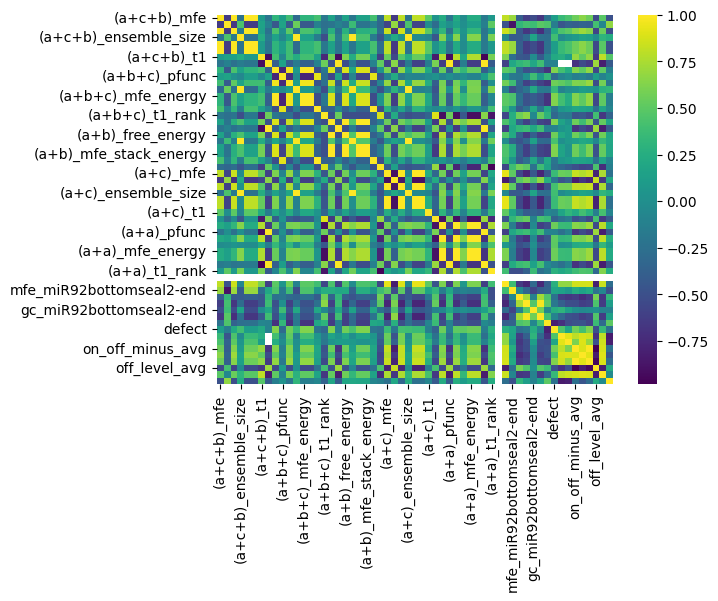

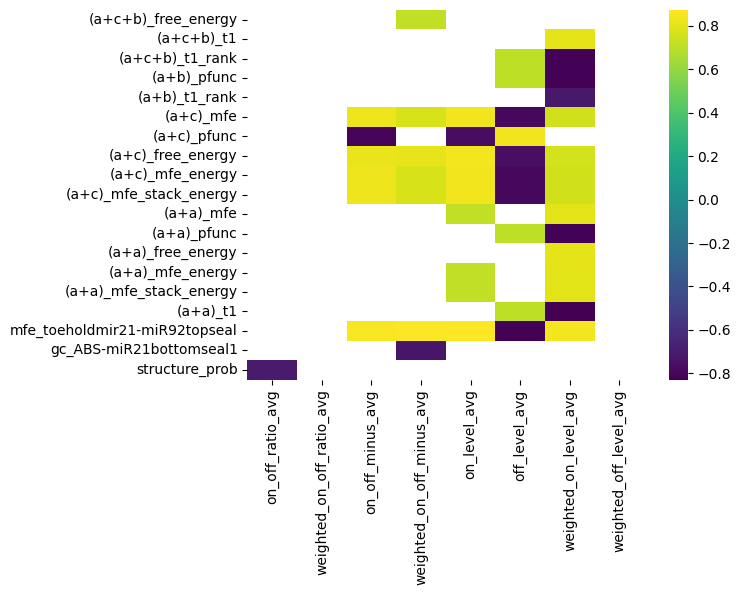

In [23]:
# Get the correlation between the DataFrame and the label
metrics_inf = ['on_off_ratio_avg', 'weighted_on_off_ratio_avg']
metrics_non = ['on_off_minus_avg','weighted_on_off_minus_avg', 'on_level_avg', 'off_level_avg', 
           'weighted_on_level_avg', 'weighted_off_level_avg']
corr_mat = df[params_all + metrics_inf + metrics_non].corr()
# Filter the columns based on correlation with the last column in metrics_inf
filtered_columns = corr_mat[metrics_inf+metrics_non][np.abs(corr_mat[metrics_inf+metrics_non]) >= 0.7][:-8]
filtered_columns = filtered_columns.dropna(how='all')

# Create a heatmap of the correlations
sns.heatmap(corr_mat, annot=False, cmap = 'viridis')
plt.show()

sns.heatmap(filtered_columns, annot=False, cmap = 'viridis')
plt.show()

In [24]:
# Drop rows where all columns have NaN values
filtered_columns = filtered_columns.dropna(how='all')
fil_col = filtered_columns.index.tolist()
fil_col, len(fil_col)


(['(a+c+b)_free_energy',
  '(a+c+b)_t1',
  '(a+c+b)_t1_rank',
  '(a+b)_pfunc',
  '(a+b)_t1_rank',
  '(a+c)_mfe',
  '(a+c)_pfunc',
  '(a+c)_free_energy',
  '(a+c)_mfe_energy',
  '(a+c)_mfe_stack_energy',
  '(a+a)_mfe',
  '(a+a)_pfunc',
  '(a+a)_free_energy',
  '(a+a)_mfe_energy',
  '(a+a)_mfe_stack_energy',
  '(a+a)_t1',
  'mfe_toeholdmir21-miR92topseal',
  'gc_ABS-miR21bottomseal1',
  'structure_prob'],
 19)

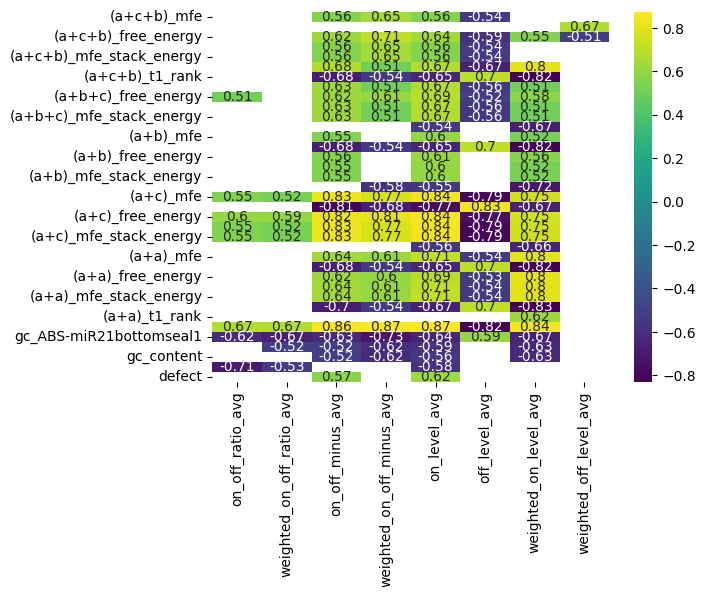

<Figure size 8000x60000 with 0 Axes>

In [45]:

sns.heatmap(corr_mat[metrics_inf+metrics_non][np.abs(corr_mat[metrics_inf+metrics_non]) >= 0.5][:-8].dropna(how='all'), annot=True, cmap = 'viridis')
plt.figure(figsize=(80, 600))
plt.show()

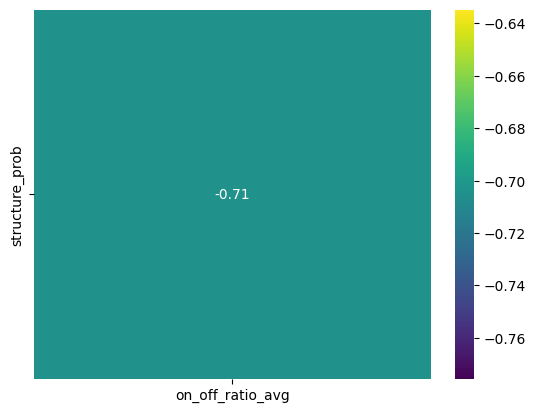

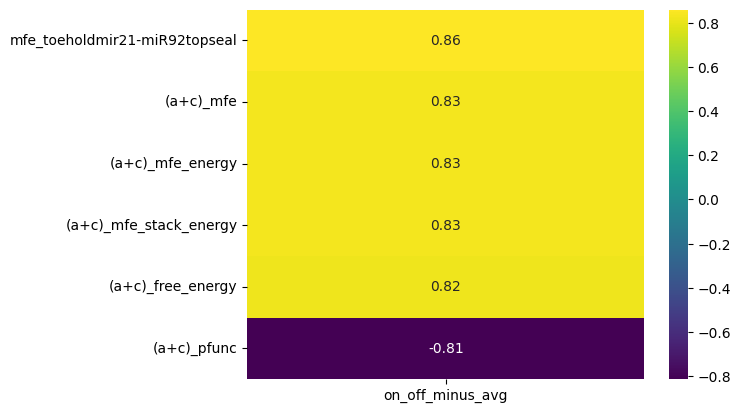

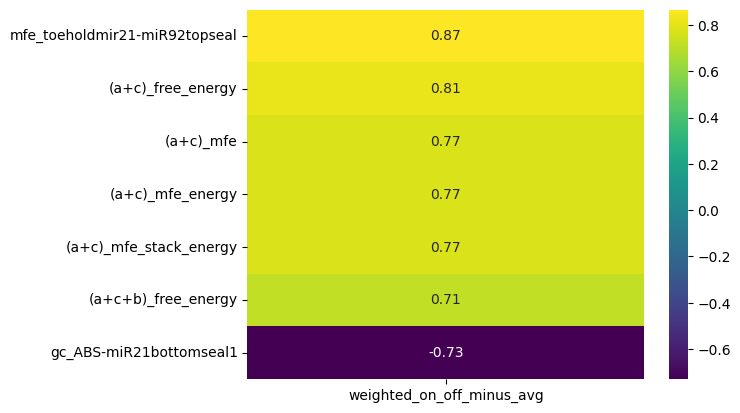

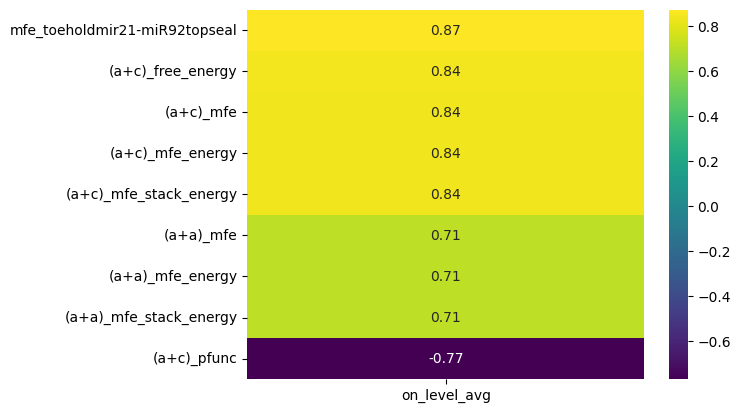

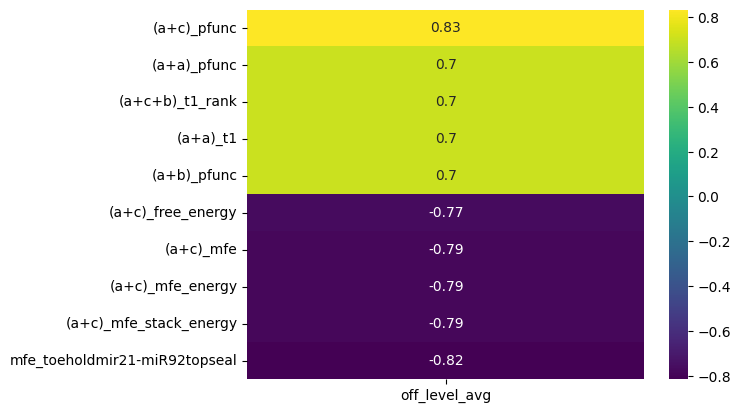

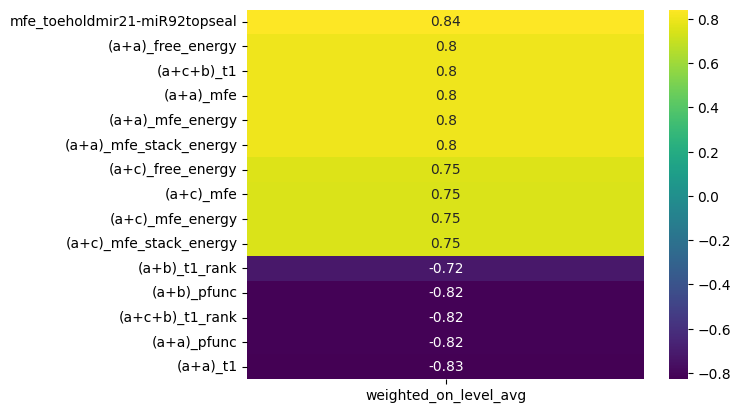

In [82]:
for i in metrics_inf+metrics_non:
    # display(corr_mat[np.abs(corr_mat[i]) >= 0.5][i])
    flcl = pd.DataFrame(corr_mat[:-8][np.abs(corr_mat[:-8][i]) >= 0.7][i]).sort_values(by=i, ascending=False)
    if len(flcl) > 0:
        sns.heatmap(flcl, annot=True, cmap = 'viridis')
        plt.show()

R^2: -0.2746448928041334
MSE: 2.1452592114189764
RMSE: 1.4646703422336975
on_off_ratio_avg


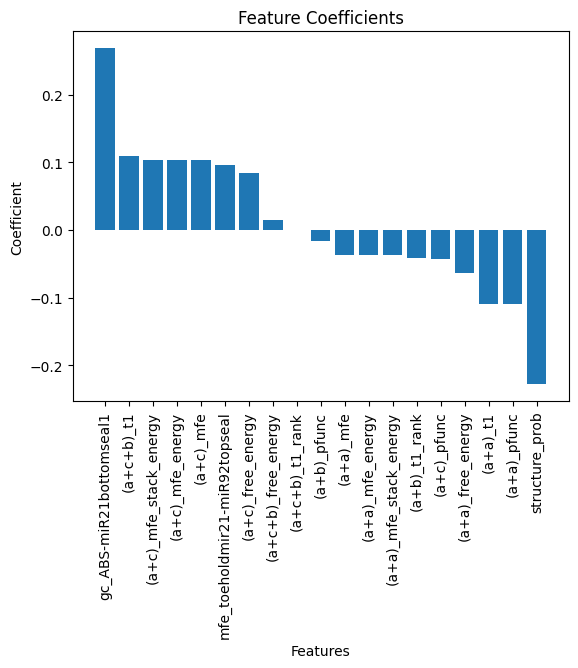

,Features,Coefficients,Absolute Coefficients
0,gc_ABS-miR21bottomseal1,2.686167e-01,2.686167e-01
18,structure_prob,-2.278336e-01,2.278336e-01
1,(a+c+b)_t1,1.099376e-01,1.099376e-01
17,(a+a)_pfunc,-1.090607e-01,1.090607e-01
16,(a+a)_t1,-1.090530e-01,1.090530e-01
2,(a+c)_mfe_stack_energy,1.030470e-01,1.030470e-01
3,(a+c)_mfe_energy,1.030470e-01,1.030470e-01
4,(a+c)_mfe,1.030470e-01,1.030470e-01
5,mfe_toeholdmir21-miR92topseal,9.639214e-02,9.639214e-02
6,(a+c)_free_energy,8.404526e-02,8.404526e-02


R^2: -0.10333979851099384
MSE: 0.6599370055262264
RMSE: 0.8123650691199286
weighted_on_off_ratio_avg


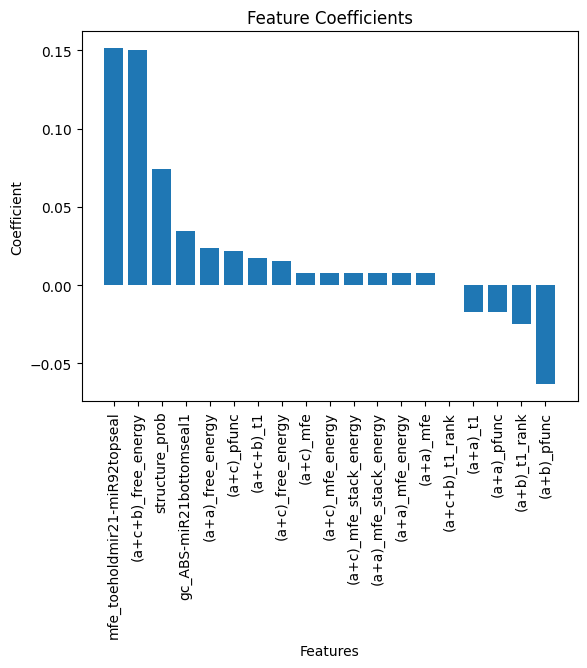

,Features,Coefficients,Absolute Coefficients
0,mfe_toeholdmir21-miR92topseal,1.514716e-01,1.514716e-01
1,(a+c+b)_free_energy,1.501237e-01,1.501237e-01
2,structure_prob,7.430139e-02,7.430139e-02
18,(a+b)_pfunc,-6.327183e-02,6.327183e-02
3,gc_ABS-miR21bottomseal1,3.432923e-02,3.432923e-02
17,(a+b)_t1_rank,-2.490901e-02,2.490901e-02
4,(a+a)_free_energy,2.366798e-02,2.366798e-02
5,(a+c)_pfunc,2.195582e-02,2.195582e-02
6,(a+c+b)_t1,1.768584e-02,1.768584e-02
16,(a+a)_pfunc,-1.738122e-02,1.738122e-02


R^2: -3.087377308559403
MSE: 0.05939811841065556
RMSE: 0.24371729198121245
on_off_minus_avg


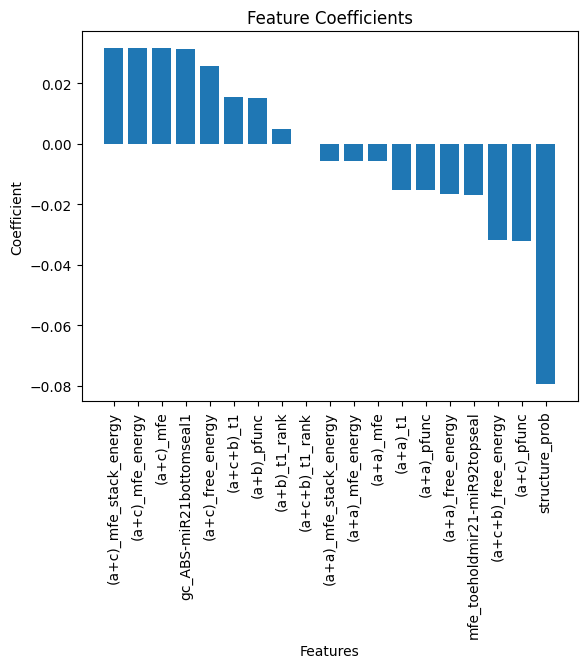

,Features,Coefficients,Absolute Coefficients
18,structure_prob,-7.939889e-02,7.939889e-02
17,(a+c)_pfunc,-3.223798e-02,3.223798e-02
16,(a+c+b)_free_energy,-3.183830e-02,3.183830e-02
1,(a+c)_mfe_energy,3.158457e-02,3.158457e-02
0,(a+c)_mfe_stack_energy,3.158457e-02,3.158457e-02
2,(a+c)_mfe,3.158457e-02,3.158457e-02
3,gc_ABS-miR21bottomseal1,3.132168e-02,3.132168e-02
4,(a+c)_free_energy,2.554077e-02,2.554077e-02
15,mfe_toeholdmir21-miR92topseal,-1.690681e-02,1.690681e-02
14,(a+a)_free_energy,-1.652270e-02,1.652270e-02


R^2: -0.08429228227423669
MSE: 0.006282730190213125
RMSE: 0.07926367509908384
weighted_on_off_minus_avg


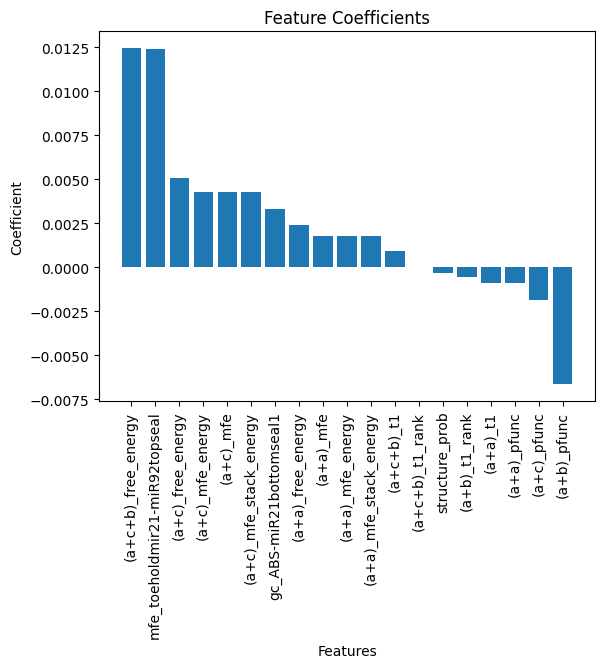

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_free_energy,1.246083e-02,1.246083e-02
1,mfe_toeholdmir21-miR92topseal,1.242588e-02,1.242588e-02
18,(a+b)_pfunc,-6.644432e-03,6.644432e-03
2,(a+c)_free_energy,5.092637e-03,5.092637e-03
3,(a+c)_mfe_energy,4.258954e-03,4.258954e-03
4,(a+c)_mfe,4.258954e-03,4.258954e-03
5,(a+c)_mfe_stack_energy,4.258954e-03,4.258954e-03
6,gc_ABS-miR21bottomseal1,3.305793e-03,3.305793e-03
7,(a+a)_free_energy,2.392973e-03,2.392973e-03
17,(a+c)_pfunc,-1.868145e-03,1.868145e-03


R^2: -1.801823908418795
MSE: 0.01318038060913504
RMSE: 0.11480583874148144
on_level_avg


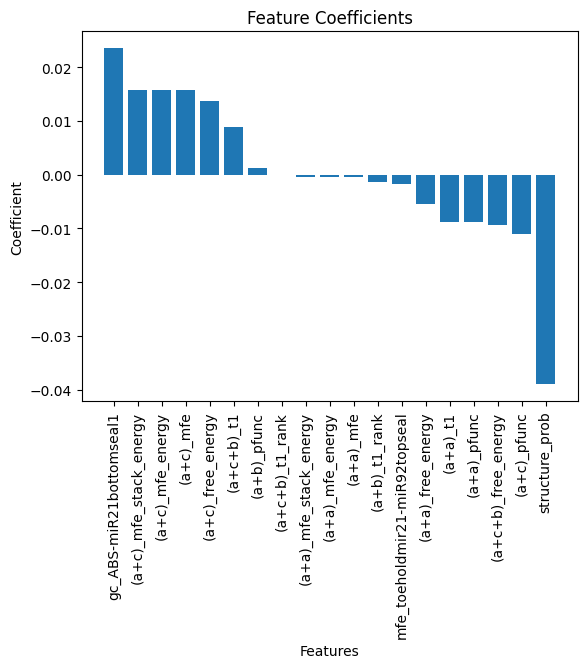

,Features,Coefficients,Absolute Coefficients
18,structure_prob,-3.898423e-02,3.898423e-02
0,gc_ABS-miR21bottomseal1,2.351448e-02,2.351448e-02
2,(a+c)_mfe_energy,1.569850e-02,1.569850e-02
1,(a+c)_mfe_stack_energy,1.569850e-02,1.569850e-02
3,(a+c)_mfe,1.569850e-02,1.569850e-02
4,(a+c)_free_energy,1.373034e-02,1.373034e-02
17,(a+c)_pfunc,-1.112831e-02,1.112831e-02
16,(a+c+b)_free_energy,-9.390279e-03,9.390279e-03
5,(a+c+b)_t1,8.816024e-03,8.816024e-03
15,(a+a)_pfunc,-8.727066e-03,8.727066e-03


R^2: -5.440262702380113
MSE: 0.017388910923903492
RMSE: 0.13186701984917795
off_level_avg


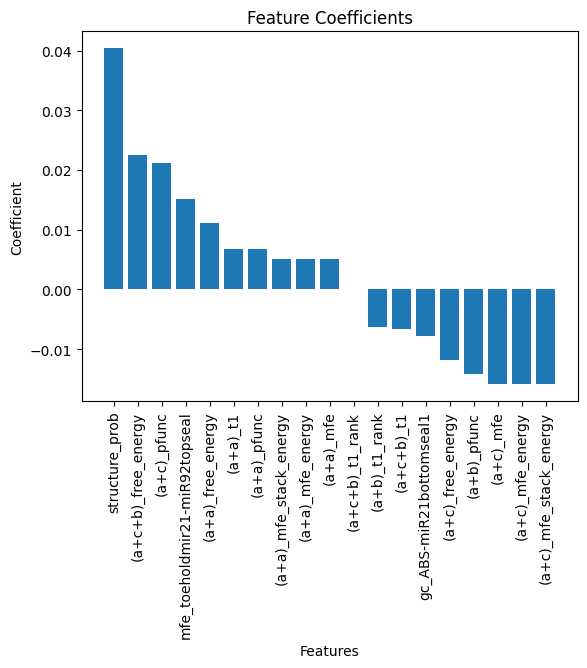

,Features,Coefficients,Absolute Coefficients
0,structure_prob,4.041466e-02,4.041466e-02
1,(a+c+b)_free_energy,2.244803e-02,2.244803e-02
2,(a+c)_pfunc,2.110966e-02,2.110966e-02
17,(a+c)_mfe_energy,-1.588607e-02,1.588607e-02
18,(a+c)_mfe_stack_energy,-1.588607e-02,1.588607e-02
16,(a+c)_mfe,-1.588607e-02,1.588607e-02
3,mfe_toeholdmir21-miR92topseal,1.508717e-02,1.508717e-02
15,(a+b)_pfunc,-1.410635e-02,1.410635e-02
14,(a+c)_free_energy,-1.181043e-02,1.181043e-02
4,(a+a)_free_energy,1.106378e-02,1.106378e-02


R^2: 0.10139442427104906
MSE: 0.0015772053125750942
RMSE: 0.039714044273721286
weighted_on_level_avg


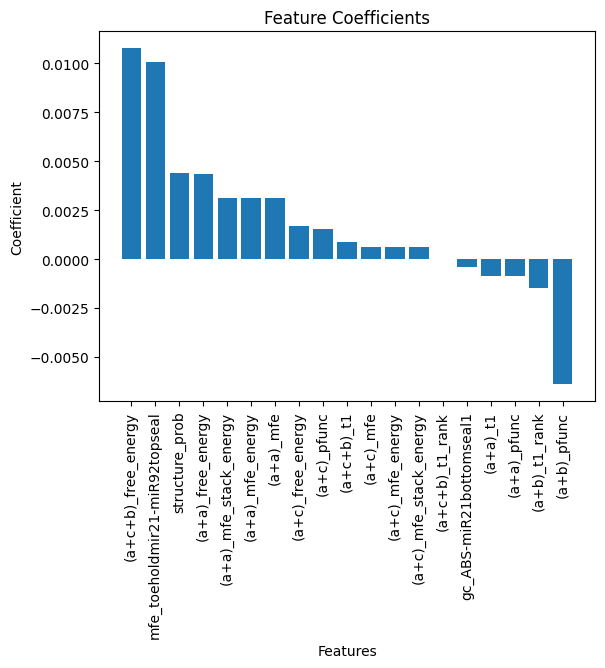

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_free_energy,1.077920e-02,1.077920e-02
1,mfe_toeholdmir21-miR92topseal,1.004885e-02,1.004885e-02
18,(a+b)_pfunc,-6.392087e-03,6.392087e-03
2,structure_prob,4.385171e-03,4.385171e-03
3,(a+a)_free_energy,4.373298e-03,4.373298e-03
4,(a+a)_mfe_stack_energy,3.127015e-03,3.127015e-03
5,(a+a)_mfe_energy,3.127015e-03,3.127015e-03
6,(a+a)_mfe,3.127015e-03,3.127015e-03
7,(a+c)_free_energy,1.711082e-03,1.711082e-03
8,(a+c)_pfunc,1.514234e-03,1.514234e-03


R^2: -0.3354095191298041
MSE: 0.0015642919160548674
RMSE: 0.039551130401732734
weighted_off_level_avg


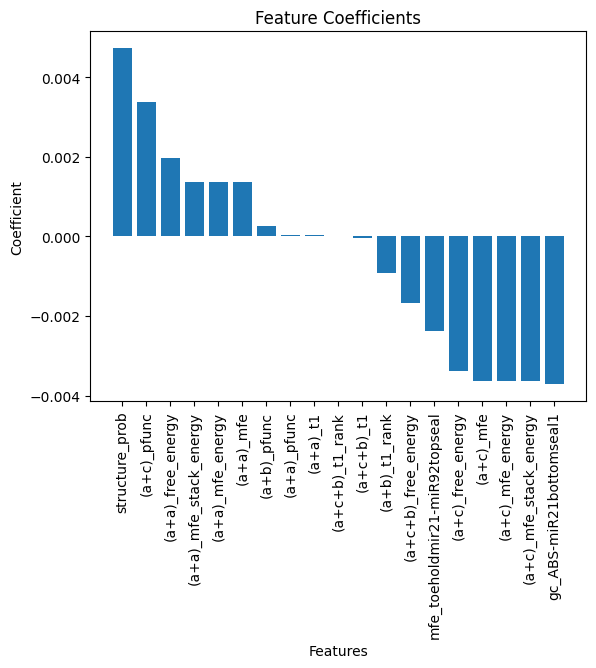

,Features,Coefficients,Absolute Coefficients
0,structure_prob,4.734875e-03,4.734875e-03
18,gc_ABS-miR21bottomseal1,-3.714982e-03,3.714982e-03
17,(a+c)_mfe_stack_energy,-3.641040e-03,3.641040e-03
16,(a+c)_mfe_energy,-3.641040e-03,3.641040e-03
15,(a+c)_mfe,-3.641040e-03,3.641040e-03
1,(a+c)_pfunc,3.382379e-03,3.382379e-03
14,(a+c)_free_energy,-3.381555e-03,3.381555e-03
13,mfe_toeholdmir21-miR92topseal,-2.377027e-03,2.377027e-03
2,(a+a)_free_energy,1.980326e-03,1.980326e-03
12,(a+c+b)_free_energy,-1.681629e-03,1.681629e-03


In [73]:
for label in metrics_inf:
    X = df_non_inf[fil_col]
    y = df_non_inf[label]
    model = linreg(X, y)
    print(label)
    sf, sc = metrics(model, fil_col)
    display_metrics(sf, sc)
    
for label in metrics_non:
    X = df_non_inf[fil_col]
    y = df_non_inf[label]
    model = linreg(X, y)
    print(label)
    sf, sc = metrics(model, fil_col)
    display_metrics(sf, sc)

R^2: -0.20111888639444997
MSE: 12.336382198225008
RMSE: 3.5123186356344447


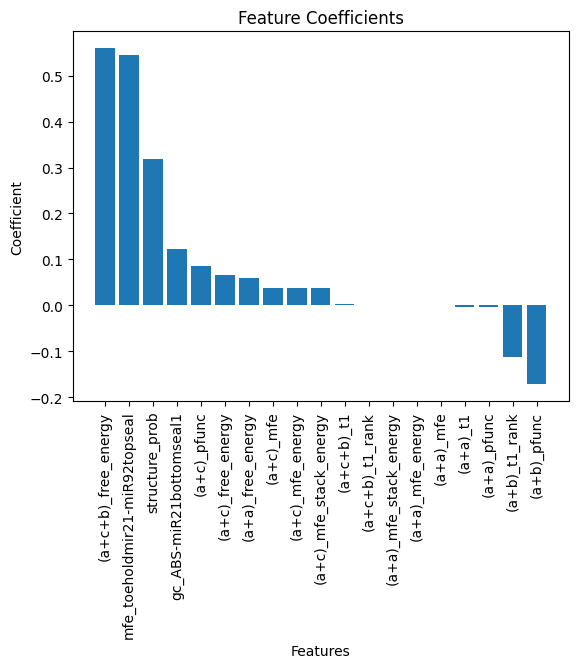

,Features,Coefficients,Absolute Coefficients
0,(a+c+b)_free_energy,5.599485e-01,5.599485e-01
1,mfe_toeholdmir21-miR92topseal,5.440263e-01,5.440263e-01
2,structure_prob,3.189673e-01,3.189673e-01
18,(a+b)_pfunc,-1.716567e-01,1.716567e-01
3,gc_ABS-miR21bottomseal1,1.229193e-01,1.229193e-01
17,(a+b)_t1_rank,-1.127572e-01,1.127572e-01
4,(a+c)_pfunc,8.550585e-02,8.550585e-02
5,(a+c)_free_energy,6.499120e-02,6.499120e-02
6,(a+a)_free_energy,5.878649e-02,5.878649e-02
7,(a+c)_mfe,3.846909e-02,3.846909e-02


In [74]:
# ON OFF ratio a-c-b
X = df_non_inf[fil_col]
y = df_non_inf['on_off_ratio_(a+c+b)']
model = linreg(X, y)
sf, sc = metrics(model, fil_col)
display_metrics(sf, sc)